# Image classification on fashion_mnnist datasets of Keras

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Import libraries

In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

## Loading the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualizing the Data

In [6]:
print(" X_train: {} images".format(X_train.shape[0]) + "\n", 
     "y_train: {} images".format(y_train.shape[0]) + "\n",
     "X_test: {} images".format(X_test.shape[0]) + "\n",
     "y_test: {} images".format(y_test.shape[0]) + "\n")

 X_train: 60000 images
 y_train: 60000 images
 X_test: 10000 images
 y_test: 10000 images



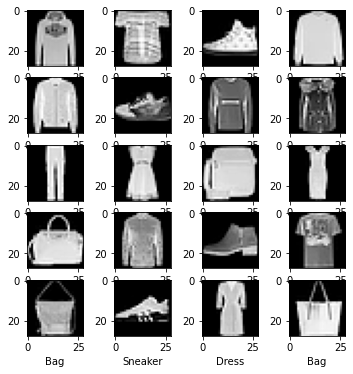

In [7]:
# plot 20 random images from the our dataset in grayscale

w=10
h=10
fig=plt.figure(figsize=(6, 6))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    rand = np.random.randint(60000)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[rand], cmap="gray")
    plt.xlabel(class_names[y_train[rand]])
plt.show()

### Preprocessing the Data



In [8]:
X_train.max()

255

Normalize the X train and X test data by dividing by the max value of the image arrays.

In [9]:
X_train = X_train/255
X_test = X_test/255

Reshape the X arrays to include a 4 dimension of the single channel

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
print(X_train.shape, "\n",X_test.shape)

(60000, 28, 28, 1) 
 (10000, 28, 28, 1)


Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test,10) 
y_cat_train = to_categorical(y_train,10)

### Building the Model

In [14]:
model= tf.keras.Sequential()

# Create convolutional neural network for my model
model.add(layers.Conv2D(filters = 32, kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))

model.add(layers.Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training and save the Model

In [16]:
# Train/Fit the model to the x_train set with 10 epochs
model.fit(X_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 7ms/step - loss: 0.4028 - accuracy: 0.8570
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2784 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2375 - accuracy: 0.9150
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2125 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1948 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1779 - accuracy: 0.9363 0s - loss: 0.1781 - accuracy: 0.
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1650 - accuracy: 0.9430
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1546 - accuracy: 0.9457
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1443 - accuracy: 0.9486
Epoch 10/10
1875/1875 [=================

In [17]:
model.save("fashion_cnn_e10")

INFO:tensorflow:Assets written to: fashion_cnn_e10\assets


### Evaluating the Model

In [35]:
model.metrics_names

['loss', 'accuracy']

In [18]:
test_loss, test_acc = model.evaluate(X_test,y_cat_test)
print("Model accuracy: {:.3f}".format(test_acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.3253 - accuracy: 0.9087
Model accuracy: 0.909


In [41]:
predictions =  model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
print(predictions[0])

9


In [40]:
# Deprecated method

predictions = model.predict_classes(X_test)
print(predictions[0])

C:\Users\mamen\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1000
           1       0.97      0.98      0.97      1000
           2       0.81      0.88      0.84      1000
           3       0.95      0.85      0.90      1000
           4       0.86      0.83      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.71      0.73      1000
           7       0.97      0.91      0.94      1000
           8       0.99      0.97      0.98      1000
           9       0.90      0.99      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Visualize predictions

Load saved model

In [19]:
loaded_model = tf.keras.models.load_model('fashion_cnn_e10')

In [20]:
predictions =  loaded_model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
print(predictions[0])

9


In [58]:
def show_result(img):
    classification =[""]
    img = img.reshape(1,28,28,1)
    prediction = np.argmax(model.predict(img), axis=-1)[0]
    return class_names[prediction]
    
    # prediction_array = np.round(model.predict(img),0)
    # count = [i for i, j in enumerate(prediction_array[0]) if j == max(prediction_array[0])]
    # if count[0]==0:
    #     return "T-shirt/top"
    # elif count[0]==1:
    #     return "Trouser"
    # elif count[0]==2:
    #     return "Pullover"
    # elif count[0]==3:
    #     return "Dress"
    # elif count[0]==4:
    #     return "Coat"
    # elif count[0]==5:
    #     return "Sandal"
    # elif count[0]==6:
    #     return "Shirt"
    # elif count[0]==7:
    #     return "Sneaker"
    # elif count[0]==8:
    #     return "Bag"
    # elif count[0]==9:
    #     return "Ankle boot"


Text(0.5, 0, 'Dress')

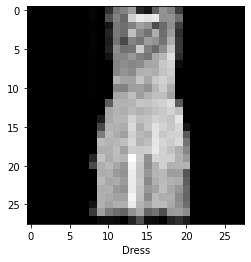

In [59]:
# Test with single random image

rand = np.random.randint(10000)
img = X_test[rand]
# print(show_resut(img))
img=img.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.xlabel(show_result(img))


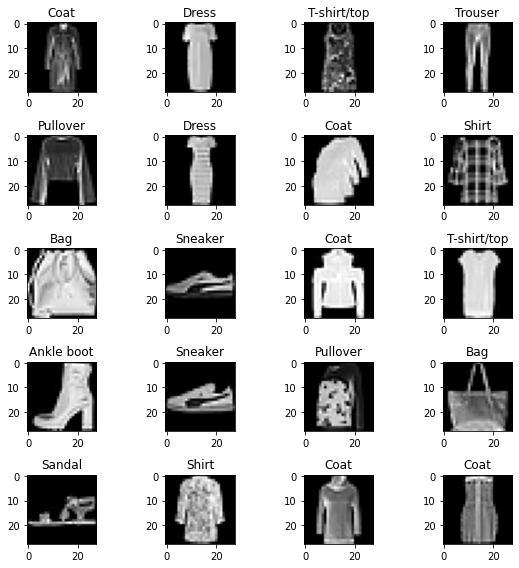

In [60]:
# plot 20 random images from the our dataset in grayscale and give prediction

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
fig_list= []

for i in range(1, columns*rows +1):
    rand = np.random.randint(10000)
    fig_list.append(fig.add_subplot(rows, columns, i))
    fig_list[-1].set_title(show_result(X_test[rand]))
    plt.imshow(X_test[rand].reshape(28,28), cmap="gray")
    
plt.tight_layout()   
plt.show()